___
# CHALLENGE 1 - MTA DATA

### 1. Import packages and Magics

In [32]:
import pandas as pd
import seaborn as sns
import numpy as np
import requests
import datetime
import matplotlib.pyplot as plt
import matplotlib

#%pylab inline 
%config InlineBackend.figure_format = 'svg'
%matplotlib inline 
%config IPCompleter.greedy=True
sns.set_style("white")


## PART 1 
1. Open up a new IPython notebook
2. Download a few MTA turnstile data files
3. Open up a file, use csv reader to read it and ensure there is a column for each feature (C/A, UNIT, SCP, STATION).


### 2. Pull Data from URLs

In [33]:
download = True # switch

# using 6 weeks of data for complete month of June 2018
if download:
    dates=['180602','180609','180616','180623','180630','180707']
    
    mta_dfs = []
    
    for this_date in dates:
        url = f'http://web.mta.info/developers/data/nyct/turnstile/turnstile_{this_date}.txt'
        print(f'downloading {url}')
        
        mta_dfs.append(
            pd.read_csv(url)
        )

    df_mta = pd.concat(mta_dfs)
    df_mta.to_csv('turnstile_backup.csv')
else:
    df_mta = pd.read_csv('turnstile_backup.csv', index_col=0)

downloading http://web.mta.info/developers/data/nyct/turnstile/turnstile_180602.txt
downloading http://web.mta.info/developers/data/nyct/turnstile/turnstile_180609.txt
downloading http://web.mta.info/developers/data/nyct/turnstile/turnstile_180616.txt
downloading http://web.mta.info/developers/data/nyct/turnstile/turnstile_180623.txt
downloading http://web.mta.info/developers/data/nyct/turnstile/turnstile_180630.txt
downloading http://web.mta.info/developers/data/nyct/turnstile/turnstile_180707.txt


### 3. Reset Index

In [34]:
df_mta.reset_index(inplace=True, drop=True)
df_mta.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2018,00:00:00,REGULAR,6633898,2248498
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2018,04:00:00,REGULAR,6633916,2248500
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2018,08:00:00,REGULAR,6633928,2248517
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2018,12:00:00,REGULAR,6634015,2248577
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2018,16:00:00,REGULAR,6634173,2248610


<font color="blue">**PART 1: The data structure contains all 4 features and has been read**</font>

## PART 2

Convert to this into a time series.

### 4. Remove extra space in column names

In [35]:
df_mta.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [36]:
df_mta.columns = df_mta.columns.str.strip()
df_mta.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

### 5.  Make Datetime Object
Convert the ['DATE'] and ['TIME'] strings into a datetime object

In [37]:
df_mta['DATETIME_STR'] = df_mta['DATE'] + ' ' + df_mta['TIME']

In [38]:
df_mta['DATETIME'] = pd.to_datetime(df_mta['DATETIME_STR'], format="%m/%d/%Y %H:%M:%S")

In [39]:
df_mta.drop('DATETIME_STR', axis=1, inplace=True)
df_mta.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2018,00:00:00,REGULAR,6633898,2248498,2018-05-26 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2018,04:00:00,REGULAR,6633916,2248500,2018-05-26 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2018,08:00:00,REGULAR,6633928,2248517,2018-05-26 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2018,12:00:00,REGULAR,6634015,2248577,2018-05-26 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2018,16:00:00,REGULAR,6634173,2248610,2018-05-26 16:00:00


<font color="blue">**PART 2: The data and time column has been used and coverted into a DATATIME object**</font>

## PART 3

Calculate the total daily entries for each turnstile.
Your result should be a new data frame that has the same keys, but now we have a single value for a single day, which is the total number of passengers that entered through this turnstile on this day.onvert to this into a time series.

### 6. Sort data

In [40]:
df_mta.sort_values(by=['STATION', 'UNIT', 'C/A', 'SCP', 'DATETIME'], inplace=True)
df_mta.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
29979,H007,R248,00-00-00,1 AV,L,BMT,05/26/2018,00:00:00,REGULAR,13569667,15200381,2018-05-26 00:00:00
29980,H007,R248,00-00-00,1 AV,L,BMT,05/26/2018,04:00:00,REGULAR,13569755,15200616,2018-05-26 04:00:00
29981,H007,R248,00-00-00,1 AV,L,BMT,05/26/2018,08:00:00,REGULAR,13569834,15200917,2018-05-26 08:00:00
29982,H007,R248,00-00-00,1 AV,L,BMT,05/26/2018,12:00:00,REGULAR,13570342,15201709,2018-05-26 12:00:00
29983,H007,R248,00-00-00,1 AV,L,BMT,05/26/2018,16:00:00,REGULAR,13571036,15202735,2018-05-26 16:00:00


In [41]:
# df_mta.to_csv('output_stage1.csv')

### 7. Group data by turnstile.  Calculate entries and exits remove cumulative.

In [42]:
# groupby individual turnstiles
turnstile =['STATION', 'UNIT', 'C/A', 'SCP']

df_mta['ENTRY_DIFF'] = (df_mta.groupby(turnstile)['ENTRIES']
                           .diff()) 
#df_mta.head()

In [43]:
df_mta['EXIT_DIFF'] = (df_mta.groupby(turnstile)['EXITS']
                           .diff()) 
#df_mta.head()

### 8. Removing unreasonable values  

In [44]:
bignum = 100_000

df_mta = df_mta[
    (df_mta["EXIT_DIFF"] > 0) &
    (df_mta["ENTRY_DIFF"] > 0) &
    (df_mta["EXIT_DIFF"] < bignum) &
    (df_mta["ENTRY_DIFF"] < bignum)
]

In [45]:
df_mta.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,ENTRY_DIFF,EXIT_DIFF
29980,H007,R248,00-00-00,1 AV,L,BMT,05/26/2018,04:00:00,REGULAR,13569755,15200616,2018-05-26 04:00:00,88.0,235.0
29981,H007,R248,00-00-00,1 AV,L,BMT,05/26/2018,08:00:00,REGULAR,13569834,15200917,2018-05-26 08:00:00,79.0,301.0
29982,H007,R248,00-00-00,1 AV,L,BMT,05/26/2018,12:00:00,REGULAR,13570342,15201709,2018-05-26 12:00:00,508.0,792.0
29983,H007,R248,00-00-00,1 AV,L,BMT,05/26/2018,16:00:00,REGULAR,13571036,15202735,2018-05-26 16:00:00,694.0,1026.0
29984,H007,R248,00-00-00,1 AV,L,BMT,05/26/2018,20:00:00,REGULAR,13571652,15203771,2018-05-26 20:00:00,616.0,1036.0


### 9. Grouping and Aggregating - per turnstile per day

In [46]:
# calculate daily values per turnstile
daily_per_turnstile = df_mta.groupby(['C/A','UNIT','SCP','STATION',df_mta['DATETIME'].dt.date]).sum().reset_index()


# removing columns such as Linename division date, time, desc, cumulative entries and exit
daily_per_turnstile = daily_per_turnstile[['C/A','UNIT','SCP','STATION','DATETIME','ENTRY_DIFF','EXIT_DIFF']]

# renaming columns for clarity (diff->daily )
daily_per_turnstile = daily_per_turnstile.rename(columns={'ENTRY_DIFF': 'DAILY_ENTRY', 'EXIT_DIFF': 'DAILY_EXIT'})

#add column for DAILY_TOTAL - sum of exits + entries

daily_per_turnstile['DAILY_TOTAL'] = daily_per_turnstile['DAILY_ENTRY'] + daily_per_turnstile['DAILY_EXIT']

# DATETIME object type was lost after the grouping and reseting so I have just redone done it
daily_per_turnstile['DATETIME'] = pd.to_datdaily_per_turnstile.to_csv('turnstile.csv')

# sort and display by descending DAILY_TOTAL for each turnstile
daily_per_turnstile.head().sort_values(by=['DAILY_TOTAL'], ascending=False)


,C/A,UNIT,SCP,STATION,DATETIME,DAILY_ENTRY,DAILY_EXIT,DAILY_TOTAL
4,A002,R051,02-00-00,59 ST,2018-05-30,1398.0,577.0,1975.0
3,A002,R051,02-00-00,59 ST,2018-05-29,1258.0,543.0,1801.0
2,A002,R051,02-00-00,59 ST,2018-05-28,551.0,162.0,713.0
1,A002,R051,02-00-00,59 ST,2018-05-27,489.0,131.0,620.0
0,A002,R051,02-00-00,59 ST,2018-05-26,469.0,147.0,616.0


In [47]:
daily_per_turnstile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169919 entries, 0 to 169918
Data columns (total 8 columns):
C/A            169919 non-null object
UNIT           169919 non-null object
SCP            169919 non-null object
STATION        169919 non-null object
DATETIME       169919 non-null datetime64[ns]
DAILY_ENTRY    169919 non-null float64
DAILY_EXIT     169919 non-null float64
DAILY_TOTAL    169919 non-null float64
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 10.4+ MB


<font color="blue">**PART 3: We have grouped and aggregated the total entries for each turnstile on a given day. The tunstile at - (A002,R051,02-00-00,59 ST) has the highest values so we will plot this in the next challenge**</font>

## PART 4

Now plot the daily time series for a turnstile.

### 10. Selecting data for one turnstile

In [48]:
# setup condition to selectturnstile ['A002','R051','02-00-00','59 ST']
condition = (daily_per_turnstile['C/A'] == 'A002') \
& (daily_per_turnstile['UNIT'] =='R051') \
& (daily_per_turnstile['SCP'] =='02-00-00')\
& (daily_per_turnstile['STATION'] =='59 ST')

# selecting single turnstile 
one_turnstile = daily_per_turnstile.loc[condition,:]

# selecting only month of June
one_turnstile=one_turnstile.loc[one_turnstile['DATETIME'].dt.month == 6,:].reset_index()
one_turnstile.head()

,index,C/A,UNIT,SCP,STATION,DATETIME,DAILY_ENTRY,DAILY_EXIT,DAILY_TOTAL
0,6,A002,R051,02-00-00,59 ST,2018-06-01,1520.0,554.0,2074.0
1,7,A002,R051,02-00-00,59 ST,2018-06-02,718.0,225.0,943.0
2,8,A002,R051,02-00-00,59 ST,2018-06-03,580.0,146.0,726.0
3,9,A002,R051,02-00-00,59 ST,2018-06-04,1375.0,532.0,1907.0
4,10,A002,R051,02-00-00,59 ST,2018-06-05,1492.0,532.0,2024.0


### 11. Plot timeseries for one turnstile 

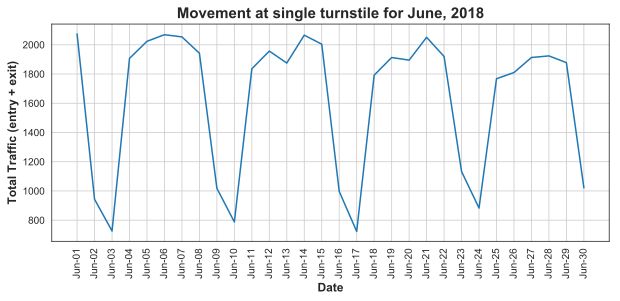

In [49]:
# setting figure size

plt.figure(figsize=(10,4))

# plotting timeseries dt.strftime for more human readablity
plt.plot(one_turnstile['DATETIME'].dt.strftime('%b-%d'),one_turnstile['DAILY_TOTAL']);

#formatting
plt.grid()
plt.xticks(rotation=90);
plt.ylabel("Total Traffic (entry + exit)",fontsize = 12, weight = 'bold')
plt.xlabel("Date",fontsize = 12, weight = 'bold')
plt.title("Movement at single turnstile for June, 2018",fontsize = 15, weight = 'bold');

<font color="blue">**PART 4: We have plotted the total traffic for one turnstile for the month of June,2018 as a timeseries**</font>

## PART 5

We want to combine the numbers together -- for each ControlArea/UNIT/STATION combo, for each day, add the counts from each turnstile belonging to that combo.

### 12. Group and aggregate for Combo

In [50]:
# going back to daily_per_turnstile
daily_per_turnstile.head()

,C/A,UNIT,SCP,STATION,DATETIME,DAILY_ENTRY,DAILY_EXIT,DAILY_TOTAL
0,A002,R051,02-00-00,59 ST,2018-05-26,469.0,147.0,616.0
1,A002,R051,02-00-00,59 ST,2018-05-27,489.0,131.0,620.0
2,A002,R051,02-00-00,59 ST,2018-05-28,551.0,162.0,713.0
3,A002,R051,02-00-00,59 ST,2018-05-29,1258.0,543.0,1801.0
4,A002,R051,02-00-00,59 ST,2018-05-30,1398.0,577.0,1975.0


In [51]:
combo = daily_per_turnstile.groupby(['C/A','UNIT','STATION','DATETIME']).sum()
combo.head()

DAILY_ENTRY  DAILY_EXIT  DAILY_TOTAL
C/A  UNIT STATION DATETIME                                        
A002 R051 59 ST   2018-05-26       4950.0      2951.0       7901.0
                  2018-05-27       5120.0      2602.0       7722.0
                  2018-05-28       5512.0      2934.0       8446.0
                  2018-05-29      12513.0      7898.0      20411.0
                  2018-05-30      13733.0      8697.0      22430.0

<font color="blue">**PART 5: We have have summed up the traffic at all the SCPs located within a 'C/A','UNIT','STATION' combo for each day in our timeframe.**</font>

## PART 6

Similarly, combine everything in each station, and come up with a time series of [(date1, count1),(date2,count2),...] type of time series for each STATION, by adding up all the turnstiles in a station.

In [52]:
# going back to daily_per_turnstile
daily_per_turnstile.head()

,C/A,UNIT,SCP,STATION,DATETIME,DAILY_ENTRY,DAILY_EXIT,DAILY_TOTAL
0,A002,R051,02-00-00,59 ST,2018-05-26,469.0,147.0,616.0
1,A002,R051,02-00-00,59 ST,2018-05-27,489.0,131.0,620.0
2,A002,R051,02-00-00,59 ST,2018-05-28,551.0,162.0,713.0
3,A002,R051,02-00-00,59 ST,2018-05-29,1258.0,543.0,1801.0
4,A002,R051,02-00-00,59 ST,2018-05-30,1398.0,577.0,1975.0


In [53]:
station_traffic= daily_per_turnstile.groupby(['STATION','DATETIME']).sum().reset_index()
station_traffic.head()

,STATION,DATETIME,DAILY_ENTRY,DAILY_EXIT,DAILY_TOTAL
0,1 AV,2018-05-26,12813.0,14984.0,27797.0
1,1 AV,2018-05-27,13287.0,15456.0,28743.0
2,1 AV,2018-05-28,12572.0,14472.0,27044.0
3,1 AV,2018-05-29,20705.0,23595.0,44300.0
4,1 AV,2018-05-30,22414.0,24313.0,46727.0


<font color="blue">**PART 6: We have summed up the traffic at each station for each day in our timeframe.**</font>

## PART 7

Plot the time series (either daily or your preferred level of granularity) for a station.

### 13. Selecting data for one station

In [54]:
# select station - 34 ST-PENN STA - a high traffic statiom
station_select =station_traffic.loc[station_traffic['STATION']=='34 ST-PENN STA',:] 

# selecting only month of June and storing in station_plot --- we will use station_select later in part 8 
station_plot=station_select.loc[station_select['DATETIME'].dt.month == 6,:].reset_index()
station_plot.head()

,index,STATION,DATETIME,DAILY_ENTRY,DAILY_EXIT,DAILY_TOTAL
0,2485,34 ST-PENN STA,2018-06-01,168815.0,147007.0,315822.0
1,2486,34 ST-PENN STA,2018-06-02,84260.0,82378.0,166638.0
2,2487,34 ST-PENN STA,2018-06-03,82284.0,68841.0,151125.0
3,2488,34 ST-PENN STA,2018-06-04,171575.0,136190.0,307765.0
4,2489,34 ST-PENN STA,2018-06-05,172123.0,144230.0,316353.0


### 14. Plot timeseries for one turnstile 

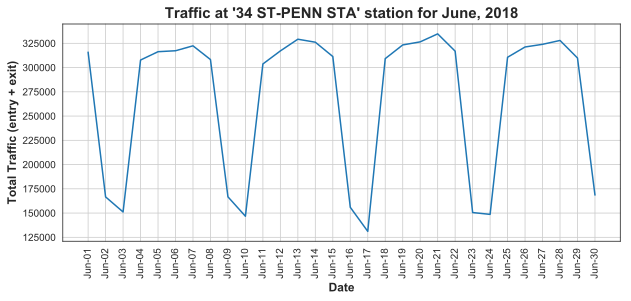

In [55]:
# setting figure size

plt.figure(figsize=(10,4))

# plotting timeseries dt.strftime for more human readablity
plt.plot(station_plot['DATETIME'].dt.strftime('%b-%d'),station_plot['DAILY_TOTAL']);

#formatting
plt.grid()
plt.xticks(rotation=90);
plt.ylabel("Total Traffic (entry + exit)",fontsize = 12, weight = 'bold')
plt.xlabel("Date",fontsize = 12, weight = 'bold')
plt.title("Traffic at '34 ST-PENN STA' station for June, 2018",fontsize = 15, weight = 'bold');

<font color="blue">**PART 7: We have plotted the total traffic for one station for the month of June,2018 as a timeseries**</font>

## PART 8

Select a station and find the total daily counts for this station. Then plot those daily counts for each week separately.

To clarify: if I have 10 weeks of data on the 28th st 6 station, I will add 10 lines to the same figure (e.g. running plt.plot(week_count_list) once for each week). Each plot will have 7 points of data.

In [56]:
# using station_select previously created with daily traffic for 34 ST-PENN STA 
# station_select - has data for 7 weeks -  not to be confused with with station_plot which has only data for JUNE 
station_select.head()

,STATION,DATETIME,DAILY_ENTRY,DAILY_EXIT,DAILY_TOTAL
2479,34 ST-PENN STA,2018-05-26,65857.0,67112.0,132969.0
2480,34 ST-PENN STA,2018-05-27,67135.0,63341.0,130476.0
2481,34 ST-PENN STA,2018-05-28,79525.0,62689.0,142214.0
2482,34 ST-PENN STA,2018-05-29,171150.0,137030.0,308180.0
2483,34 ST-PENN STA,2018-05-30,175163.0,142981.0,318144.0


### 15. Plot each week for a station

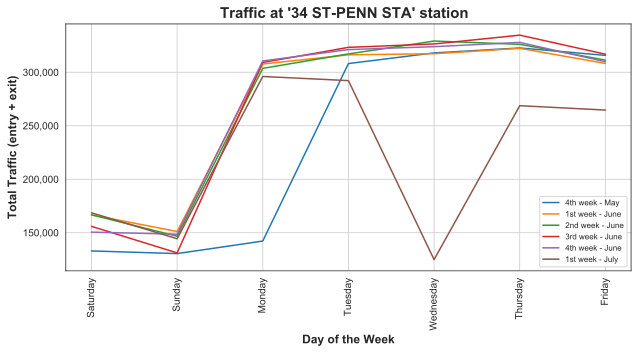

In [57]:
# 1. Human readable markers, order based on data grouping for the week
markers = ['Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday']
legend =['4th week - May','1st week - June','2nd week - June','3rd week - June','4th week - June','1st week - July']
# 2. Return Axis
fig, ax = plt.subplots(figsize=[9,5])

# 3. Plot one line for each station
i = 0
while (i+7<=49): # 7 weeks of data
    week_data=station_select.iloc[i:i+7,:].reset_index()
    plt.plot(week_data.index,week_data['DAILY_TOTAL'])
    i+=7


# 4. Format
# grids 
plt.grid()

# x and y axis marking
ticks_x = np.linspace(0, 6, 7)
plt.xticks(ticks_x, markers, rotation=90);

# quick way to insert , seperators for large number -- 100,000 instead of 100000

ax.get_yaxis().set_major_formatter(
     matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ','))
 )

#labels,titles, legend 
plt.ylabel("Total Traffic (entry + exit)",fontsize = 12, weight = 'bold')
plt.xlabel("Day of the Week",fontsize = 12, weight = 'bold')
plt.title("Traffic at '34 ST-PENN STA' station  ",fontsize = 15, weight = 'bold')
plt.legend(legend, loc = 'lower right', fontsize=8);
plt.tight_layout()

# to save graphic -- uncomment if you need to save image
#plt.savefig('Traffic for top 10 stations.pdf',format='pdf',transparent=True)



<font color="blue">**PART 8: We have plotted the total traffic for one station for each of the 7 weeks of data collected by a seperate line. Interesting to note the sudden fall in traffic for the 1st week of July which coressponds to 4th of July**</font>

## PART  9

Over multiple weeks, sum total ridership for each station and sort them, so you can find out the stations with the highest traffic during the time you investigate

In [58]:
# using station_traffic refer part 6 
station_traffic.head()

,STATION,DATETIME,DAILY_ENTRY,DAILY_EXIT,DAILY_TOTAL
0,1 AV,2018-05-26,12813.0,14984.0,27797.0
1,1 AV,2018-05-27,13287.0,15456.0,28743.0
2,1 AV,2018-05-28,12572.0,14472.0,27044.0
3,1 AV,2018-05-29,20705.0,23595.0,44300.0
4,1 AV,2018-05-30,22414.0,24313.0,46727.0


### 16. Group and aggregate using .mean()

In [59]:
# we have already sum up all turnstiles in each station for a given day 
# to calculate highest traffic stations will use a groupby with mean
station_ridership = station_traffic.groupby(['STATION']).mean().reset_index()
station_ridership.head()

,STATION,DAILY_ENTRY,DAILY_EXIT,DAILY_TOTAL
0,1 AV,19598.547619,21485.238095,41083.785714
1,103 ST,27672.190476,18660.952381,46333.142857
2,103 ST-CORONA,17324.357143,12727.238095,30051.595238
3,104 ST,2417.095238,1111.880952,3528.976190
4,110 ST,9292.738095,7977.571429,17270.309524


### 17. Top 10 stations

In [60]:
# top 10 station by sorting
station_ridership = station_ridership.sort_values(by='DAILY_TOTAL', ascending=False).reset_index()
station_ridership.head(10)

,index,STATION,DAILY_ENTRY,DAILY_EXIT,DAILY_TOTAL
0,60,34 ST-PENN STA,138613.190476,118806.190476,257419.380952
1,232,GRD CNTRL-42 ST,120388.476190,100644.880952,221033.357143
2,58,34 ST-HERALD SQ,93946.666667,84960.428571,178907.095238
3,352,TIMES SQ-42 ST,88017.428571,82853.428571,170870.857143
4,14,14 ST-UNION SQ,90313.142857,79540.333333,169853.476190
5,45,23 ST,88487.309524,63350.285714,151837.595238
6,225,FULTON ST,80215.357143,65242.761905,145458.119048
7,67,42 ST-PORT AUTH,77715.619048,63075.523810,140791.142857
8,109,86 ST,64525.142857,58003.142857,122528.285714
9,9,125 ST,66648.976190,54114.285714,120763.261905


<font color="blue">**PART 9: We have grouped traffic data by station for all days and used  a mean for the entire timeframe. Then sorted to identify the top 10 stations**</font>

## PART 10

Make a single list of these total ridership values and plot it with plt.hist(total_ridership_counts) to get an idea about the distribution of total ridership among different stations.

This should show you that most stations have a small traffic, and the histogram bins for large traffic volumes have small bars.

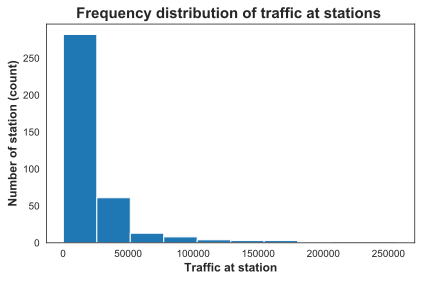

In [61]:
#using station_ridership from above
plt.hist(station_ridership['DAILY_TOTAL']);

plt.ylabel("Number of station (count)",fontsize = 12, weight = 'bold')
plt.xlabel("Traffic at station",fontsize = 12, weight = 'bold')
plt.title("Frequency distribution of traffic at stations ",fontsize = 15, weight = 'bold')
plt.tight_layout()

<font color="blue">**PART 10: The frequency districution of traffic at stations shows that most stations have very low traffic. A few stations actually make up majority of the movement / traffic**</font>

___